In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.shape

(10000, 14)

In [9]:
# prompt: check fro duplicate

df.duplicated().sum()


0

# EDA

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

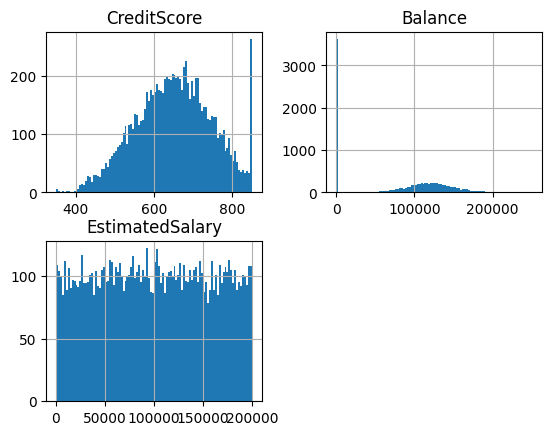

In [11]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].hist(bins=100)
plt.show()

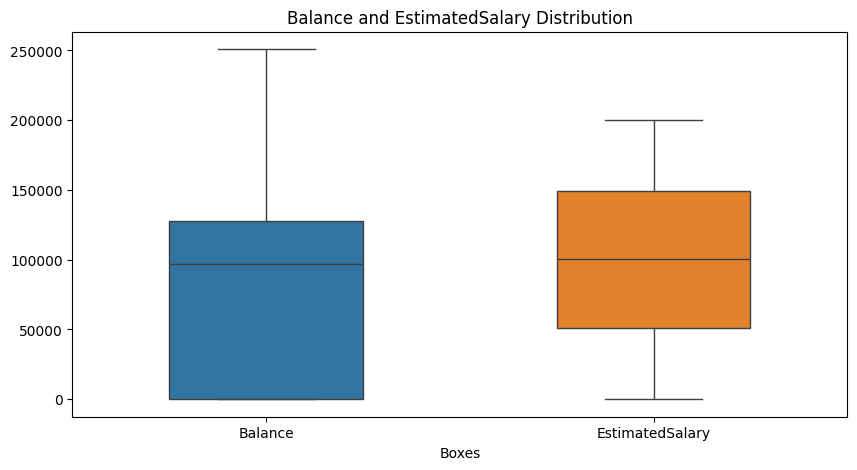

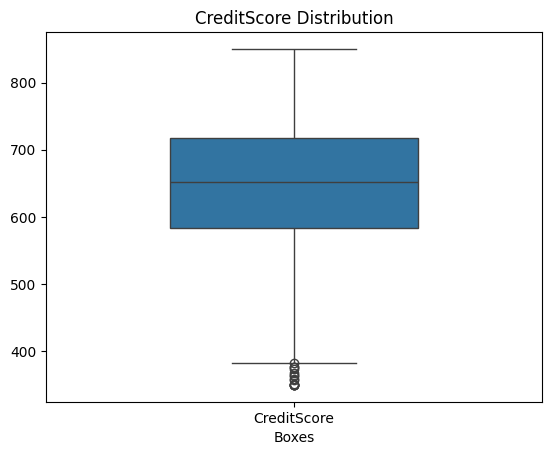

In [12]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=df[['Balance', 'EstimatedSalary']], width=0.5)
plt.title('Balance and EstimatedSalary Distribution')
plt.xlabel('Boxes')
plt.show()

sns.boxplot(data=df[['CreditScore']], width=0.5)
plt.title('CreditScore Distribution')
plt.xlabel('Boxes')
plt.show()

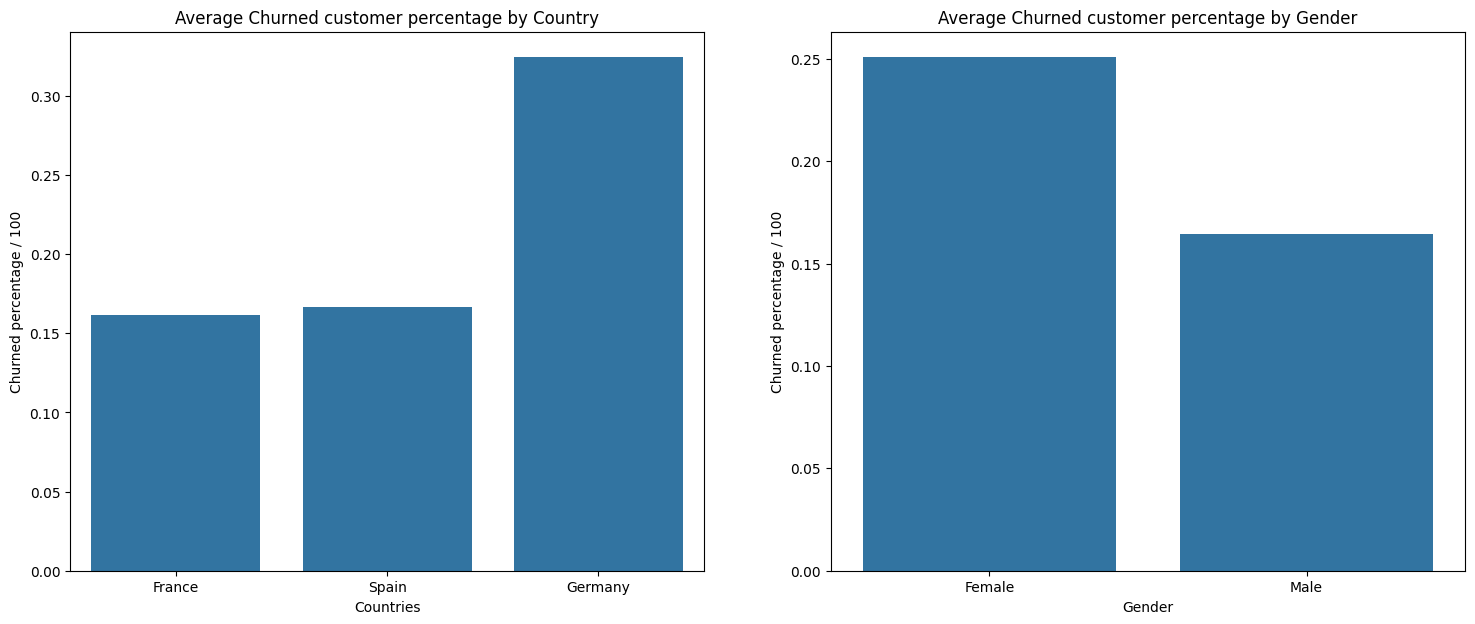

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(x='Geography', y='Exited', data=df, order=['France', 'Spain', 'Germany'], estimator=np.mean, errorbar=None, ax=axes[0])
axes[0].set_title('Average Churned customer percentage by Country')
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Churned percentage / 100')

sns.barplot(x='Gender', y='Exited', data=df, estimator=np.mean, errorbar=None, ax=axes[1])
axes[1].set_title('Average Churned customer percentage by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Churned percentage / 100')
plt.show()

# ML

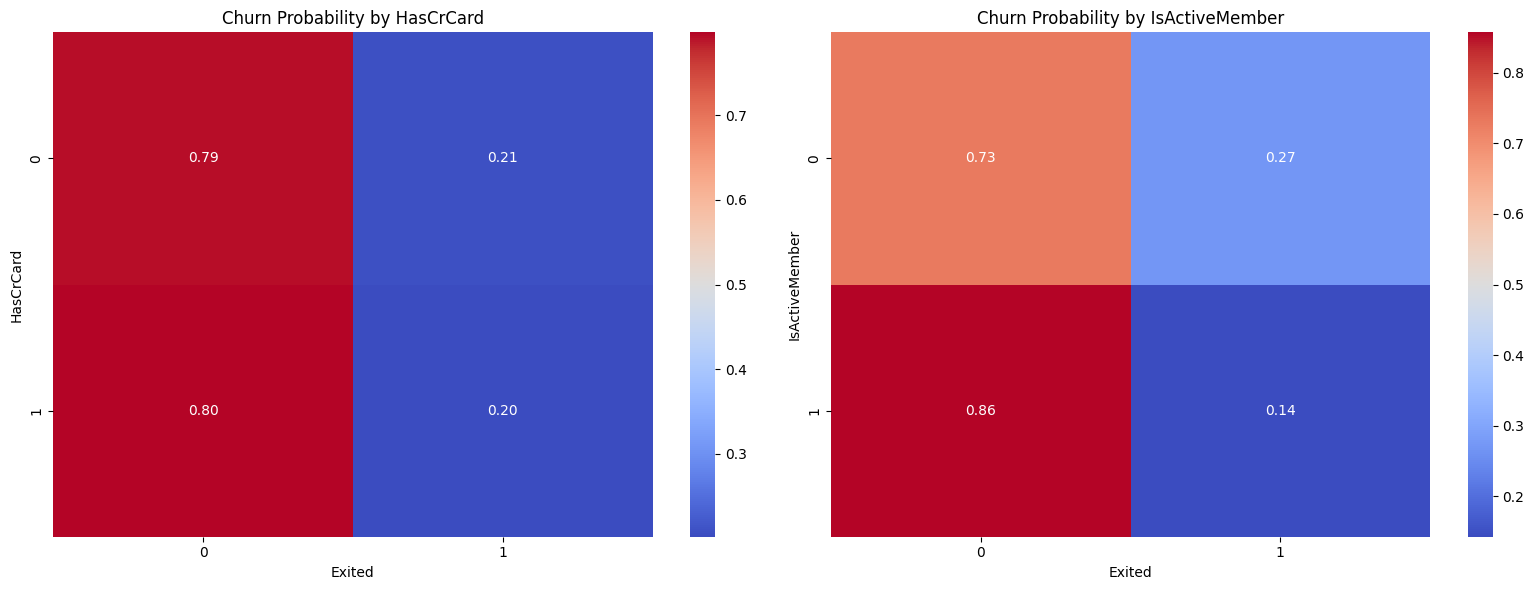

In [14]:
cross_tab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index')
cross_tab_2 = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Probability by HasCrCard')
plt.xlabel('Exited')
plt.ylabel('HasCrCard')


plt.subplot(1, 2, 2)
sns.heatmap(cross_tab_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Probability by IsActiveMember')
plt.xlabel('Exited')
plt.ylabel('IsActiveMember')

plt.tight_layout()
plt.show()

# Data encoded

In [16]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Geography'])
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


In [17]:
df_cleaned = df_encoded.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_cleaned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  bool   
 10  Gender_Male        10000 non-null  bool   
 11  Geography_France   10000 non-null  bool   
 12  Geography_Germany  10000 non-null  bool   
 13  Geography_Spain    10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


In [19]:
df_cleaned = df_cleaned[['Age', 'Tenure', 'Balance', 'NumOfProducts',
                         'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                         'Gender_Male' ,'Gender_Female', 'Geography_France',
                         'Geography_Germany', 'Geography_Spain', 'Exited']]
df_cleaned

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Gender_Female,Geography_France,Geography_Germany,Geography_Spain,Exited
0,42,2,0.00,1,1,1,101348.88,False,True,True,False,False,1
1,41,1,83807.86,1,0,1,112542.58,False,True,False,False,True,0
2,42,8,159660.80,3,1,0,113931.57,False,True,True,False,False,1
3,39,1,0.00,2,0,0,93826.63,False,True,True,False,False,0
4,43,2,125510.82,1,1,1,79084.10,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,True,False,True,False,False,0
9996,35,10,57369.61,1,1,1,101699.77,True,False,True,False,False,0
9997,36,7,0.00,1,0,1,42085.58,False,True,True,False,False,1
9998,42,3,75075.31,2,1,0,92888.52,True,False,False,True,False,1


In [20]:
df_cleaned.loc[:, ['Gender_Male', 'Gender_Female', 'Geography_France', 'Geography_Germany', 'Geography_Spain']] = df_cleaned.loc[:, ['Gender_Male', 'Gender_Female', 'Geography_France', 'Geography_Germany', 'Geography_Spain']].astype('int8')

# Pytorch

In [21]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [25]:
scaler = StandardScaler()

class CreateDataSet(Dataset):

    def __init__(self):
        super().__init__()
        xy = df_cleaned.to_numpy()

        self.x = torch.from_numpy(xy[:, :-1])
        self.x = scaler.fit_transform(self.x)
        self.y = torch.from_numpy(xy[:, -1])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

dataset = CreateDataSet()

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

batch_size=64
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

In [26]:
class ConvNet(nn.Module):
    def __init__(self, input_size: int, hidden_units: int, output_size: int, dropout: float = 0.1):
        super(ConvNet, self).__init__()

        self.conv_block_1 = nn.Sequential(
        nn.Conv1d(in_channels=input_size,
                  out_channels=hidden_units,
                  kernel_size = 3
                 ),
        nn.BatchNorm1d(hidden_units),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Conv1d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3
                ),
        nn.BatchNorm1d(hidden_units),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(in_features=hidden_units*4, out_features=hidden_units*2),
        )
        self.classifier2 = nn.Sequential(
            nn.Flatten(),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(in_features=hidden_units*2, out_features=output_size),
        )
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        x = self.classifier2(x)
        return x


In [28]:
model = ConvNet(input_size = 1,
                        hidden_units=300,
                        output_size=2
                        )

model.double().to(device)

ConvNet(
  (conv_block_1): Sequential(
    (0): Conv1d(1, 300, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv1d(300, 300, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=1200, out_features=600, bias=True)
  )
  (classifier2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=600, out_features=2, bias=True)
  )
)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [33]:
train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.58363 | Test loss: 0.39358, Test acc: 83.15%

Epoch: 2
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.40029 | Test loss: 0.38001, Test acc: 84.85%

Epoch: 3
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.39153 | Test loss: 0.37347, Test acc: 86.35%

Epoch: 4
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.37627 | Test loss: 0.41158, Test acc: 84.20%

Epoch: 5
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.37684 | Test loss: 0.37154, Test acc: 84.85%

Epoch: 6
-------
Looked at 0/8000 samples
Looked at 3840/8000 samples
Looked at 7680/8000 samples

Train loss: 0.36779 | Test loss: 0.35757, Test acc: 85.40%

Epoch: 7
-------
Looked at 0/8000 samples
Look

([tensor(0.6887, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(9.4259, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(5.3903, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(1.4199, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.6881, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(1.0392, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.7139, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.5204, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.7566, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.4091, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.5116, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.4514, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.3800, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.3724, dtype=torch.float64, grad_fn=<NllLossBackward0>),
  tensor(0.3121, dtype=torch.float64, grad_fn=<NllLossBackward

In [34]:
total , correct = 0 , 0
test_loss, test_acc = 0, 0
with torch.inference_mode():
    for X, y in test_loader:

        X = X.to(device)
        y = y.long().to(device)

        test_pred = model(X.unsqueeze(1))

        test_loss += criterion(test_pred, y)


        predicted =test_pred.argmax(dim=1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        test_acc = 100 * correct / total

    test_loss /= len(test_loader)

print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Test loss: 0.34651, Test acc: 85.75%

